# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2381 Дудкин Михаил Валерьевич и Газукина Дарья Денисовна. Вариант №3.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.


## Основные теоретические положения

**Дискретный нерекурсивный фильтр**

Для сигнала $x(n),\quad n \in [0, N-1]$ нерекурсивный фильтр в общем виде записывается как $y_n = \sum_{k=0}^{m}c_kx_{n-k}$.

**Передаточная функция**

Передаточной функцией фильтра называется такая функция, показывающая изменение сигнала в зависимости от его частоты:
$y_n = H(\omega) x_n$, или $H(\omega) = \frac{y_n}{x_n}$

Для гармонического входного сигнала $x_n = e^{i\omega n}$ получим:
$$H(\omega) = \frac{\sum_{k=0}^{m}c_ke^{i\omega (n-k)}}{e^{i\omega n}} = \sum_{k=0}^{m}c_ke^{i\omega (n-k)} e^{-i\omega n}$$

Зависимость передаточной функции от циклической частоты:

$H(2\pi f) = \tilde{H}(f)$


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

Импорт необходимых библиотек

In [2]:
from math import pi, cos, log10
import numpy as np
import matplotlib.pyplot as plt

Подготовим функцию для вывода графиков

In [3]:
def signals_plot(signals, titles):
    time_labels = np.arange(len(signals[0]))
    n = len(signals)
    plt.figure(figsize=(8, 3 * n))
    for i, (signal, title) in enumerate(zip(signals, titles), start=1):
      plt.subplot(n, 1, i)
      plt.stem(time_labels, signal, markerfmt=".", basefmt=" ")
      plt.title(title)
      plt.grid(True)
      plt.xlabel('Отсчеты')
      plt.ylabel('Уровень сигнала')
      plt.tight_layout()
    plt.show()

def H_plot(H_functions, labels):
  f = np.linspace(0, 0.5, len(H_functions[0]))
  for i, H in enumerate(H_functions):
    plt.plot(f, H, label=labels[i], linewidth=2)

  plt.xlabel('$f$', fontsize=12)
  plt.ylabel(r'$\tilde{H}(f)$', fontsize=12)
  plt.title("Зависимость передаточной функции от циклической частоты", fontsize=14)
  plt.grid(True, alpha=0.3)
  plt.legend(fontsize=10)
  plt.xlim(0, 0.5)
  plt.show()

# Задание 1

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$
. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Сглаживание сигнала прямой линией по $2n+1$ точкам означает приближение значения сигнала $s_k$ значением линейной функции в точке $k$. Линейная функция строится методом наименьших квадратов по точкам $s_{k-n}, ..., s_{k-1}, s_k, s_{k+1}, ..., s_{k+n}$.

По 3 точкам:

$f(x) = ax + b,\quad r(a, b) = \sum_{k=-1}^{1}(s_k-ak-b)^2→min$

Найдя $a$ и $b$ из условия $\nabla r = 0$ получим:
$y_n = \frac{1}{3} \sum_{k=n-1}^{n+1}s_{k}$.

Тогда для $s_n = e^{i\omega n}$
$$y_n = \frac{1}{3}(e^{i\omega (n-1)} + e^{i\omega n} + e^{i\omega (n+1)}) = \frac{1}{3} e^{i\omega n} (e^{-i\omega} + 1 + e^{i\omega}) = \frac{1}{3} e^{i\omega n}(1 + 2\cos \omega)$$

$$H(\omega) = \frac{1}{3}(1 + 2\cos \omega)$$

Таким же образом найдем передаточные функции для линейного сглаживания по 5, 7 и 9 точкам:

Для 5 точек $H(\omega) = \frac{1}{5}(1 + 2\cos \omega + 2\cos 2\omega)$

Для 7 точек $H(\omega) = \frac{1}{7}(1 + 2\cos \omega + 2\cos 2\omega + 2\cos 3\omega)$

Для 9 точек $H(\omega) = \frac{1}{9}(1 + 2\cos \omega + 2\cos 2\omega + 2\cos 3\omega + 2\cos 4\omega)$

In [4]:
def H_lin(f, n):
  H = np.ones(f.shape)
  for i in range(1, n // 2 + 1):
    H += 2 * np.cos(i * 2 * np.pi * f)
  return H / n

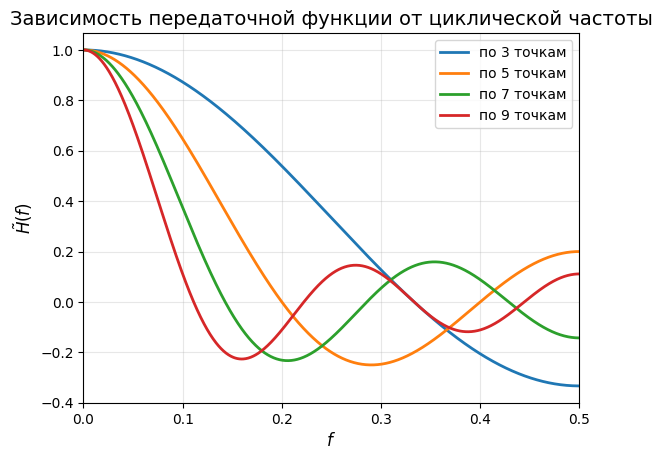

In [5]:
f = np.linspace(0, 0.5, 1000)

H_lin_3 = H_lin(f, 3)
H_lin_5 = H_lin(f, 5)
H_lin_7 = H_lin(f, 7)
H_lin_9 = H_lin(f, 9)

H_plot([H_lin_3, H_lin_5, H_lin_7, H_lin_9], ["по 3 точкам", "по 5 точкам", "по 7 точкам", "по 9 точкам"])

Линейное сглаживание это фильтр низких частот - чем выше частота, тем сильнее она подавляется. При увеличении количества точек, график $\tilde{H}(f)$ убывает круче а так же более выражен колебательный характер на высоких частотах.

# Задание 2

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$
. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Сглаживание сигнала полиномом второй степени по $2n+1$ точкам означает приближение значения сигнала $s_k$ значением квадратичной функции, построенной по соседним точкам, в точке $k$. Функция строится методом наименьших квадратов по точкам $s_{k-n}, ..., s_{k-1}, s_k, s_{k+1}, ..., s_{k+n}$.

Для 7 точек:

$f(x) = ax^2 + bx + c,\quad r(a, b, c) = \sum_{k=-3}^{3}(s_k-ak^2-bk -c)^2→min$

Найдя $a$, $b$ и $c$ из условия $\nabla r = 0$ получим:
$y_n=\frac{1}{21}(-2s_{n-3}+3s_{n-2}+6s_{n-1}+7s_n+6s_{n+1}+3s_{n+2}-2s_{n+3})$.

Тогда для $s_n = e^{i\omega n}$
$$y_n = \frac{1}{21} e^{i\omega n}(7 + 12\cos \omega + 6\cos 2\omega - 4\cos 3\omega)$$

$$H(\omega) = \frac{1}{21} (7 + 12\cos \omega + 6\cos 2\omega - 4\cos 3\omega)$$

Таким же образом найдем передаточные функции для сглаживания полиномом второй степени по 9, 11 и 13 точкам:

Для 9 точек $H(\omega)=\frac{1}{231}(59 + 108\cos\omega + 78\cos2\omega + 28\cos3\omega - 42\cos4\omega)$

Для 11 точек $H(\omega)=\frac{1}{429}(89 + 168\cos\omega + 138\cos2\omega + 88\cos3\omega + 18\cos4\omega - 72\cos5\omega)$

Для 13 точек $H(\omega) = \frac{1}{143}(25 + 48\cos\omega + 42\cos2\omega + 32\cos3\omega + 18\cos4\omega - 22\cos6\omega)$

In [6]:
def H_quad(f, n):
    if n == 7:
        return (7 + 12 * np.cos(2 * np.pi * f) + 6 * np.cos(2 * 2 * np.pi * f) -
                4 * np.cos(3 * 2 * np.pi * f)) / 21
    elif n == 9:
        return (59 + 108 * np.cos(2 * np.pi * f) + 78 * np.cos(2 * 2 * np.pi * f) +
                28 * np.cos(3 * 2 * np.pi * f) - 42 * np.cos(4 * 2 * np.pi * f)) / 231
    elif n == 11:
        return (89 + 168 * np.cos(2 * np.pi * f) + 138 * np.cos(2 * 2 * np.pi * f) +
                88 * np.cos(3 * 2 * np.pi * f) + 18 * np.cos(4 * 2 * np.pi * f) -
                72 * np.cos(5 * 2 * np.pi * f)) / 429
    elif n == 13:
        return (25 + 48 * np.cos(2 * np.pi * f) + 42 * np.cos(2 * 2 * np.pi * f) +
                32 * np.cos(3 * 2 * np.pi * f) + 18 * np.cos(4 * 2 * np.pi * f) -
                22 * np.cos(6 * 2 * np.pi * f)) / 143

In [7]:
H_quad_7 = H_quad(f, 7)
H_quad_9 = H_quad(f, 9)
H_quad_11 = H_quad(f, 11)
H_quad_13 = H_quad(f, 13)

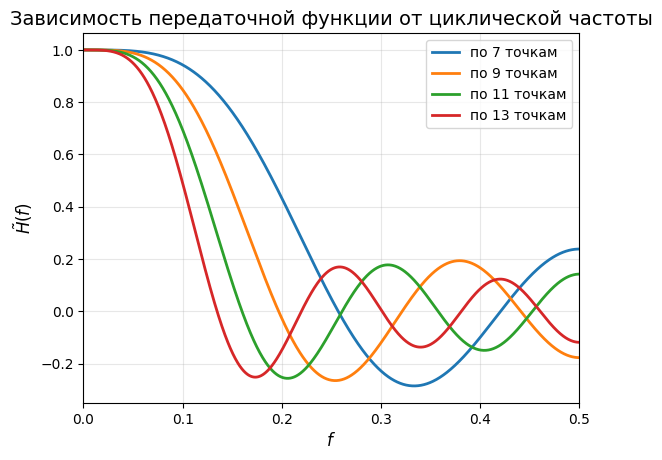

In [8]:
H_plot([H_quad_7, H_quad_9, H_quad_11, H_quad_13], ["по 7 точкам", "по 9 точкам", "по 11 точкам", "по 13 точкам"])

При использовании данного фильтра происходит подавление высоких частот, причем чем больше точек используется, тем быстрее убывает передаточная функция. Также наблюдается колебательный характер подавления в области высоких частот.

# Задание 3

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Фильтр, соответствующий сглаживанию сигнала полиномом четвертой степени строится таким же образом, как и рассмотренные ранее фильтры. Значение сигнала $s_k$ в точке $k$ приближается значением полинома 4 степени, построенного по соседним точкам. Полином строится методом наименьших квадратов по точкам $s_{k-n}, ..., s_{k-1}, s_k, s_{k+1}, ..., s_{k+n}$.

Для 9 точек:

$f(x) = ax^4 + bx^3 + cx^2 + dx + e,\quad r(a, b, c, d, e) = \sum_{k=-4}^{4}(s_k - ak^4 - bk^3 - ck^2 - dk - e)^2 → min$

Найдя коэффициенты полинома из условия $\nabla r = 0$ получим:
$y_n = \frac{1}{429}(15s_{n-4} - 55s_{n-3} + 30s_{n-2} + 135s_{n-1} + 179s_n + 135s_{n+1} + 30s_{n+2} - 55s_{n+3} + 15s_{n+4})$

$H(\omega) = \frac{1}{429}(179 + 270\cos\omega + 60\cos2\omega - 110\cos3\omega + 30\cos4\omega)$

Таким же образом найдем передаточные функции для сглаживания полиномом второй степени по 11, 13 и 15 точкам:

Для 11 точек $H(\omega) = \frac{1}{429} (143 + 240\cos \omega + 120\cos 2\omega - 20\cos 3\omega - 90\cos 4\omega + 36\cos 5\omega)$

Для 13 точек $H(\omega) = \frac{1}{2431} (677 + 1200\cos \omega + 780\cos 2\omega + 220\cos 3\omega - 270\cos 4\omega - 396\cos 5\omega + 220\cos 6\omega)$

Для 15 точек $H(\omega) = \frac{1}{46189} (11063 + 20250\cos \omega + 15000\cos 2\omega + 7510\cos 3\omega - 330\cos 4\omega - 5874\cos 5\omega - 5720\cos 6\omega + 4290\cos 7\omega)$

In [9]:
def H_fourth(f, n):
    if n == 9:
        return (179 + 270 * np.cos(2 * np.pi * f) + 60 * np.cos(2 * 2 * np.pi * f) -
                110 * np.cos(3 * 2 * np.pi * f) + 30 * np.cos(4 * 2 * np.pi * f)) / 429
    elif n == 11:
        return (143 + 240 * np.cos(2 * np.pi * f) + 120 * np.cos(2 * 2 * np.pi * f) -
                20 * np.cos(3 * 2 * np.pi * f) - 90 * np.cos(4 * 2 * np.pi * f) +
                36 * np.cos(5 * 2 * np.pi * f)) / 429
    elif n == 13:
        return (677 + 1200 * np.cos(2 * np.pi * f) + 780 * np.cos(2 * 2 * np.pi * f) +
                220 * np.cos(3 * 2 * np.pi * f) - 270 * np.cos(4 * 2 * np.pi * f) -
                396 * np.cos(5 * 2 * np.pi * f) + 220 * np.cos(6 * 2 * np.pi * f)) / 2431
    elif n == 15:
        return (11063 + 20250 * np.cos(2 * np.pi * f) + 15000 * np.cos(2 * 2 * np.pi * f) +
                7510 * np.cos(3 * 2 * np.pi * f) - 330 * np.cos(4 * 2 * np.pi * f) -
                5874 * np.cos(5 * 2 * np.pi * f) - 5720 * np.cos(6 * 2 * np.pi * f) +
                4290 * np.cos(7 * 2 * np.pi * f)) / 46189

In [10]:
H_fourth_9 = H_fourth(f, 9)
H_fourth_11 = H_fourth(f, 11)
H_fourth_13 = H_fourth(f, 13)
H_fourth_15 = H_fourth(f, 15)

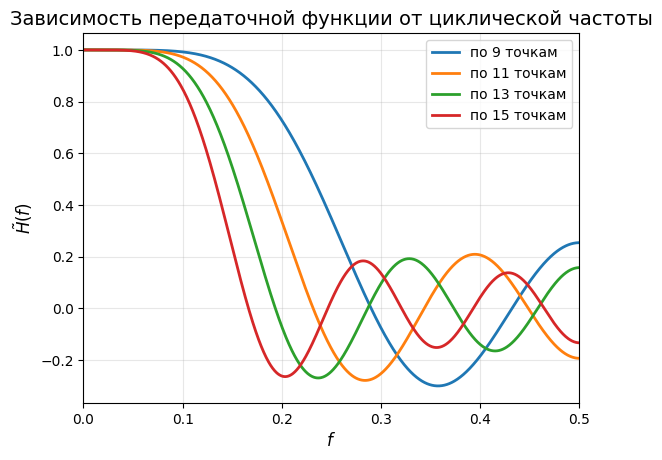

In [11]:
H_plot([H_fourth_9, H_fourth_11, H_fourth_13, H_fourth_15], ["по 9 точкам", "по 11 точкам", "по 13 точкам", "по 15 точкам"])

Засчет более высокой степени фильтр имеет более широкую полосу пропускания. С увеличением количества точек полоса пропускания уменьшается, то есть передаточная функция убывает более круто, также немного уменьшается амплитуда колебаний на высоких частотах.

# Задание 4

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Для сглаживания также применяются 15-точечная и 21-точечная формулы Спенсера.

Для 15 точек:
$y_n = \frac{1}{320} (- 3x_{n-7} - 6x_{n-6} - 5x_{n-5} + 3x_{n-4} + 21x_{n-3} + 46x_{n-2} + 67x_{n-1} + 74x_n + 67x_{n+1} + 46x_{n+2} + 21x_{n+3} + 3x_{n+4} - 5x_{n+5} - 6x_{n+6} - 3x_{n+7})$

$H(\omega) = \frac{1}{320} (74 + 134\cos \omega + 92\cos 2\omega + 42\cos 3\omega + 9\cos 4\omega - 10\cos 5\omega - 12\cos 6\omega - 6\cos 7\omega)$

Для 21 точки:
$y_n = \frac{1}{350} (x_{n-10} - 3x_{n-9} - 5x_{n-8} - 5x_{n-7} - 2x_{n-6} + 6x_{n-5} + 18x_{n-4} + 33x_{n-3} + 47x_{n-2} + 57x_{n-1} + 60x_n + 57x_{n+1} + 47x_{n+2} + 33x_{n+3} + 18x_{n+4} + 6x_{n+5} - 2x_{n+6} - 5x_{n+7} - 5x_{n+8} - 3x_{n+9} + x_{n+10})$

$H(\omega) = \frac{1}{350} (60 + 114\cos \omega + 94\cos 2\omega + 66\cos 3\omega + 36\cos 4\omega + 12\cos 5\omega - 4\cos 6\omega - 10\cos 7\omega - 10\cos 8\omega - 6\cos 9\omega + 2\cos 10\omega)$

In [12]:
def H_Spencer(f, n):
    if n == 15:
        return (74 + 134 * np.cos(2 * np.pi * f) + 92 * np.cos(2 * 2 * np.pi * f) +
                42 * np.cos(3 * 2 * np.pi * f) + 9 * np.cos(4 * 2 * np.pi * f) -
                10 * np.cos(5 * 2 * np.pi * f) - 12 * np.cos(6 * 2 * np.pi * f) -
                6 * np.cos(7 * 2 * np.pi * f)) / 320
    elif n == 21:
        return (60 + 114 * np.cos(2 * np.pi * f) + 94 * np.cos(2 * 2 * np.pi * f) +
                66 * np.cos(3 * 2 * np.pi * f) + 36 * np.cos(4 * 2 * np.pi * f) +
                12 * np.cos(5 * 2 * np.pi * f) - 4 * np.cos(6 * 2 * np.pi * f) -
                10 * np.cos(7 * 2 * np.pi * f) - 10 * np.cos(8 * 2 * np.pi * f) -
                6 * np.cos(9 * 2 * np.pi * f) + 2 * np.cos(10 * 2 * np.pi * f)) / 350

In [13]:
H_Spencer_15 = H_Spencer(f, 15)
H_Spencer_21 = H_Spencer(f, 21)

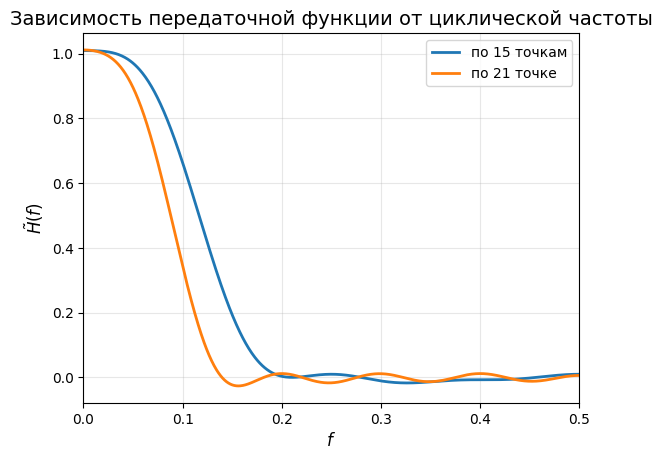

In [14]:
H_plot([H_Spencer_15, H_Spencer_21], ["по 15 точкам", "по 21 точкe"])

Сглаживание по формуле Спенсера дает эффект фильтра низких частот. При большем количестве точек полоса пропускания уже. Высокие частоты подавляются гораздо сильнее, в отличие от полиномиальных сглаживаний.

# Задание 5

Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

In [20]:
H_lin_log = [20 * np.log10(np.abs(np.array(arr))) for arr in [H_lin_3, H_lin_5, H_lin_7, H_lin_9]]
H_quad_log = [20 * np.log10(np.abs(np.array(arr))) for arr in [H_quad_7, H_quad_9, H_quad_11, H_quad_13]]
H_fourth_log = [20 * np.log10(np.abs(np.array(arr))) for arr in [H_fourth_9, H_fourth_11, H_fourth_13, H_fourth_15]]
H_Spencer_log = [20 * np.log10(np.abs(np.array(arr))) for arr in [H_Spencer_15, H_Spencer_21]]

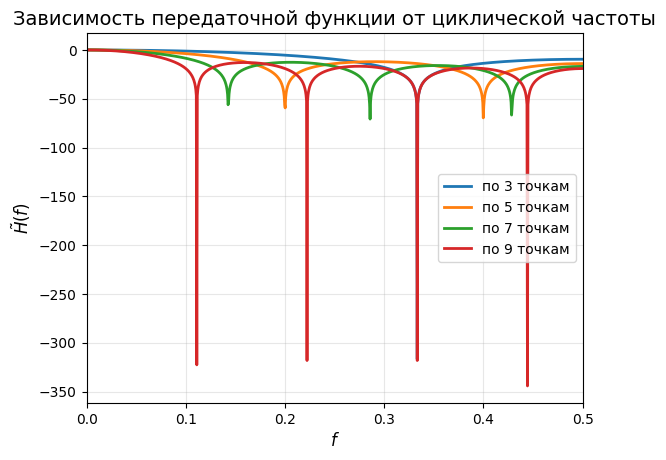

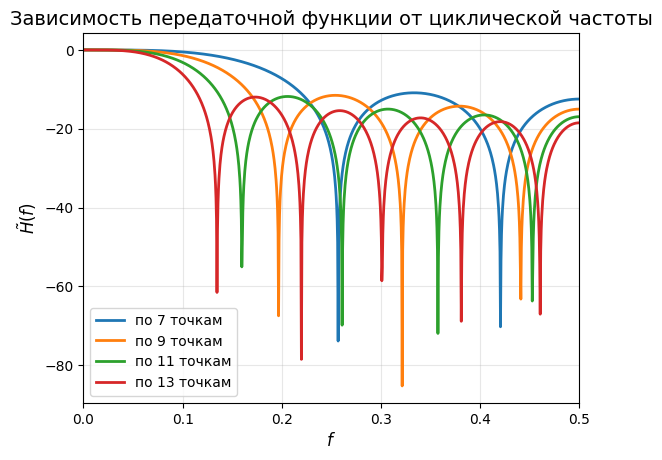

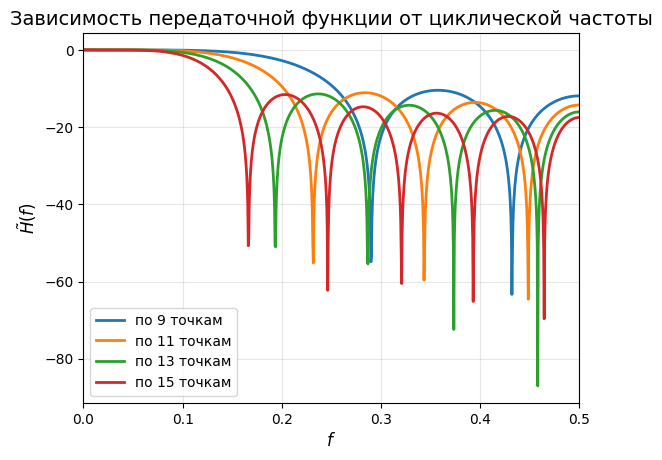

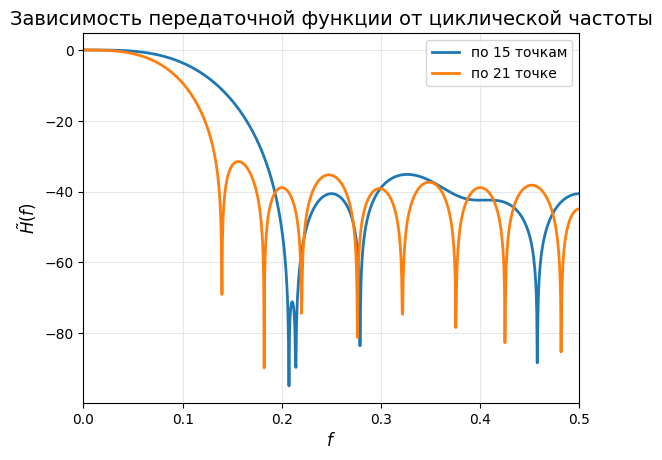

In [21]:
H_plot(H_lin_log, ["по 3 точкам", "по 5 точкам", "по 7 точкам", "по 9 точкам"])
H_plot(H_quad_log, ["по 7 точкам", "по 9 точкам", "по 11 точкам", "по 13 точкам"])
H_plot(H_fourth_log, ["по 9 точкам", "по 11 точкам", "по 13 точкам", "по 15 точкам"])
H_plot(H_Spencer_log, ["по 15 точкам", "по 21 точкe"])

В отличие от обычного графика, который показывает амплитуду передаточной функции, график с логарифмической вертикальной шкалой показывает, во сколько раз меняется значение выходного сигнала по сравнению с входным. Это позволяет различать значения, близкие к нулю. Нагляднее всего это видно на графиках для формул Спенсера: на обычном графике высокие частоты сильно подавляются, и из-за масштаба графика не понятно каковы реальные значения передаточной функции; на логарифмическом графике видно, что некоторые частоты подавляются сильнее других.

# Задание 6

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Передаточные функции из п. 1-4 соответствуют фильтрам низких частот, но обладают разными частотными свойствами. Линейное сглаживание имеет узкую полосу пропускания и высокий уровень пульсации в полосе подавления, из-за чего некоторые шумы могут усиливаться. Параболические фильтры и, особенно, фильтры 4-й степени обеспечивают более широкую полосу и значительно лучше подавляют высокие частоты. Формулы Спенсера — эффективно подавляют высокие частоты (АЧХ передаточной функции в этой области близка к нулю), однако имеют более узкую полосу пропускания по сравнению с полиномиальными фильтрами.

Увеличение количества точек сужает полосу пропускания для всех типов фильтров. Таким образом, выбор метода — это компромисс между простотой, шириной полосы, уровнем подавления шумов и отсутствием искажений АЧХ.

# Выводы

В ходе работы выявлены ключевые закономерности нерекурсивных фильтров сглаживания. При увеличении количества точек сужается полоса пропускания и улучшается подавление высоких частот. Рост степени полинома расширяет полосу пропускания и значительно снижает уровень колебаний в области высоких частот. Формулы Спенсера отличаются монотонной АЧХ без пульсаций, обеспечивая максимально гладкое подавление шумов. Логарифмический график наглядно показывает реальную эффективность подавления в децибелах, что особенно важно для оценки малых колебаний на высоких частотах. Таким образом, выбор фильтра представляет собой компромисс между шириной полосы, крутизной среза и равномерностью АЧХ.